Epoch 1/20
2/2 [==============================] - 2s 358ms/step - loss: 0.6883 - accuracy: 0.5750 - val_loss: 0.6994 - val_accuracy: 0.3000
Epoch 2/20
2/2 [==============================] - 0s 85ms/step - loss: 0.6875 - accuracy: 0.5750 - val_loss: 0.7072 - val_accuracy: 0.3000
Epoch 3/20
2/2 [==============================] - 0s 83ms/step - loss: 0.6785 - accuracy: 0.6250 - val_loss: 0.7151 - val_accuracy: 0.3000
Epoch 4/20
2/2 [==============================] - 0s 93ms/step - loss: 0.6647 - accuracy: 0.5500 - val_loss: 0.7231 - val_accuracy: 0.3000
Epoch 5/20
2/2 [==============================] - 0s 85ms/step - loss: 0.6648 - accuracy: 0.6000 - val_loss: 0.7279 - val_accuracy: 0.3000
Epoch 6/20
2/2 [==============================] - 0s 78ms/step - loss: 0.6661 - accuracy: 0.5500 - val_loss: 0.7346 - val_accuracy: 0.3000
Epoch 7/20
2/2 [==============================] - 0s 91ms/step - loss: 0.6692 - accuracy: 0.5500 - val_loss: 0.7388 - val_accuracy: 0.3000
Epoch 8/20
2/2 [==========

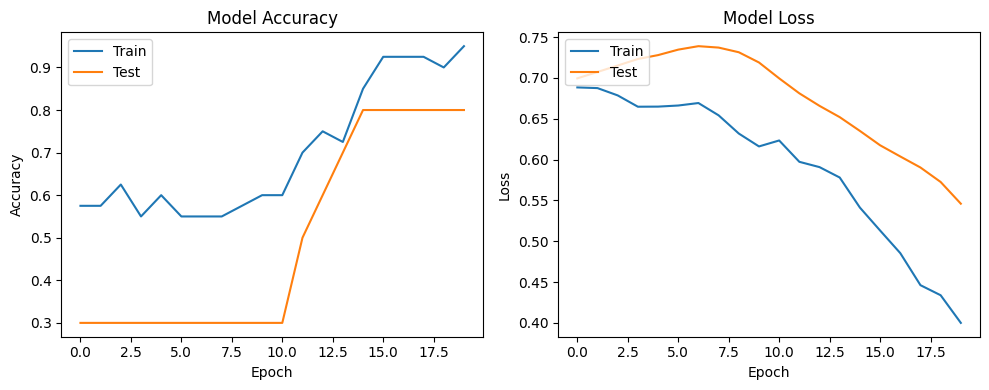

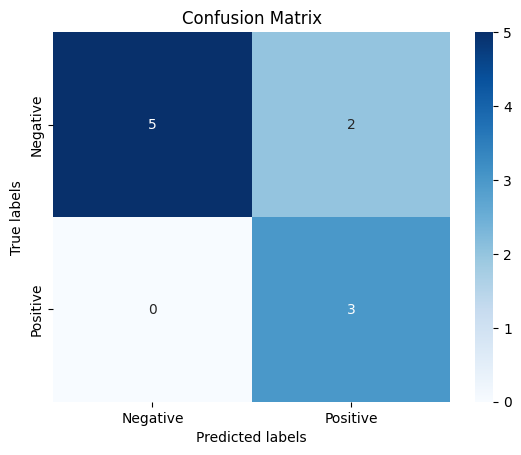

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data positif dan negatif
positive_texts = [
    "Produk ini sangat bagus dan sesuai dengan deskripsi.",
    "Saya sangat puas dengan produk ini!",
    "Barangnya berkualitas tinggi dan sesuai harapan.",
    "Layanan sangat memuaskan, penjual sangat responsif.",
    "Produk ini melebihi ekspektasi saya.",
    "Pengiriman sangat cepat dan barang diterima dengan baik.",
    "Kualitas produk sangat baik dan harga terjangkau.",
    "Sangat merekomendasikan produk ini kepada yang lain.",
    "Penjual sangat ramah dan membantu.",
    "Barang datang dalam kondisi sangat baik.",
    "Produk ini adalah pilihan terbaik yang pernah saya beli.",
    "Saya pasti akan membeli lagi dari penjual ini.",
    "Pengemasan sangat rapi dan aman.",
    "Produk berfungsi dengan sangat baik.",
    "Harga dan kualitas produk sangat sesuai.",
    "Barang sesuai dengan deskripsi dan gambar.",
    "Penjual memberikan layanan yang sangat baik.",
    "Produk ini benar-benar bermanfaat bagi saya.",
    "Pengalaman belanja yang sangat memuaskan.",
    "Kualitas produk sangat bagus, saya sangat puas.",
    "Barang sampai lebih cepat dari perkiraan.",
    "Layanan pelanggan sangat baik dan ramah.",
    "Produk ini sangat direkomendasikan.",
    "Saya pasti akan membeli lagi dari toko ini.",
    "Produk ini adalah yang terbaik di kelasnya."
]

negative_texts = [
    "Barangnya jelek dan tidak sesuai dengan yang diharapkan.",
    "Kualitas produk kurang memuaskan.",
    "Tidak puas dengan pelayanan dari penjual.",
    "Barang datang dalam kondisi rusak.",
    "Pengiriman sangat lambat dan mengecewakan.",
    "Produk tidak sesuai dengan deskripsi.",
    "Harga terlalu mahal untuk kualitas yang diberikan.",
    "Penjual tidak responsif dan tidak membantu.",
    "Produk tidak berfungsi dengan baik.",
    "Kualitas sangat buruk, tidak layak dibeli.",
    "Saya merasa sangat kecewa dengan produk ini.",
    "Barang tidak sesuai dengan gambar yang ditampilkan.",
    "Pengalaman belanja yang sangat mengecewakan.",
    "Barang yang diterima cacat dan tidak bisa digunakan.",
    "Penjual tidak memberikan informasi yang jelas.",
    "Produk ini sangat mengecewakan.",
    "Saya tidak akan membeli lagi dari penjual ini.",
    "Pengemasan sangat buruk dan tidak aman.",
    "Produk ini tidak memenuhi ekspektasi saya.",
    "Saya merasa rugi membeli produk ini.",
    "Barang sampai sangat terlambat.",
    "Layanan pelanggan sangat buruk.",
    "Produk ini tidak layak untuk dibeli.",
    "Saya tidak akan merekomendasikan produk ini.",
    "Produk ini adalah pembelian terburuk saya."
]

texts = positive_texts + negative_texts
labels = np.array([1] * len(positive_texts) + [0] * len(negative_texts))

# Tokenisasi teks
max_words = 2000  # Menambah jumlah kata maksimum yang akan dijadikan token
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequence agar memiliki panjang yang sama
maxlen = 100  # Menambah panjang sequence
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Membangun model CNN dengan lapisan tambahan dan dropout
embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Conv1D(filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
batch_size = 32
epochs = 20  # Menambah jumlah epoch
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot loss dan accuracy
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Heatmap confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


1/1 [==============================] - 0s 21ms/step
Accuracy: 0.8


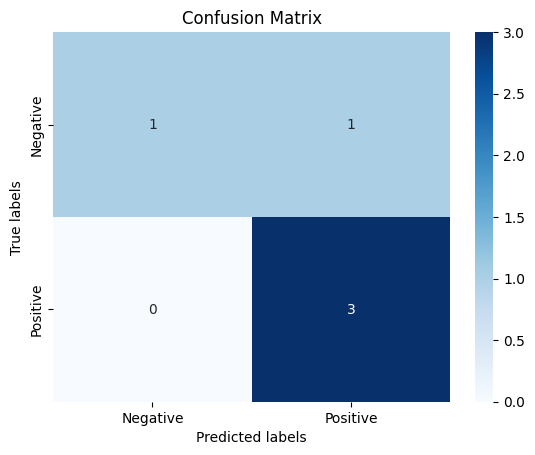

Number of Positive comments: 4
Number of Negative comments: 1


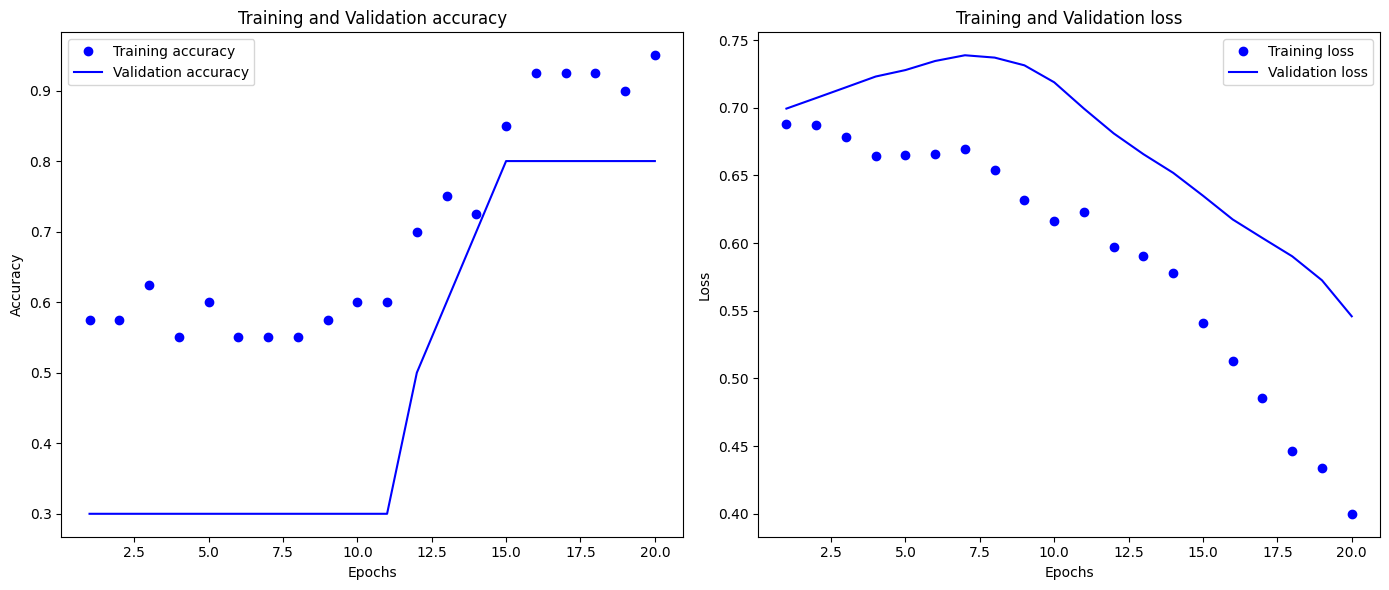

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Fungsi untuk memprediksi sentimen
def predict_sentiment(text, tokenizer, model, maxlen):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)
    prediction_prob = model.predict(padded_sequence)
    prediction = (prediction_prob > 0.5).astype(int)
    return 'Positive' if prediction == 1 else 'Negative'

# Contoh teks untuk pengujian dan label sebenarnya
test_texts = [
    "Pengalaman belanja yang sangat menyenangkan, produk bagus dan cepat sampai.",
    "Sangat kecewa dengan produk ini, tidak sesuai dengan deskripsi dan rusak.",
    "Barang bagus sekali.",
    "Barang jelek dan kotor sekali.",
    "Barang mantap dan keren sekali.",

]
true_labels = ['Positive', 'Negative', 'Positive', 'Negative', 'Positive']

# Prediksi sentimen untuk teks pengujian
predicted_labels = [predict_sentiment(text, tokenizer, model, maxlen) for text in test_texts]

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')

# Membuat diagram confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Negative', 'Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Menampilkan jumlah komentar positif dan negatif
num_positive = np.sum(np.array(predicted_labels) == 'Positive')
num_negative = np.sum(np.array(predicted_labels) == 'Negative')
print(f'Number of Positive comments: {num_positive}')
print(f'Number of Negative comments: {num_negative}')

# Plot akurasi model selama pelatihan
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
